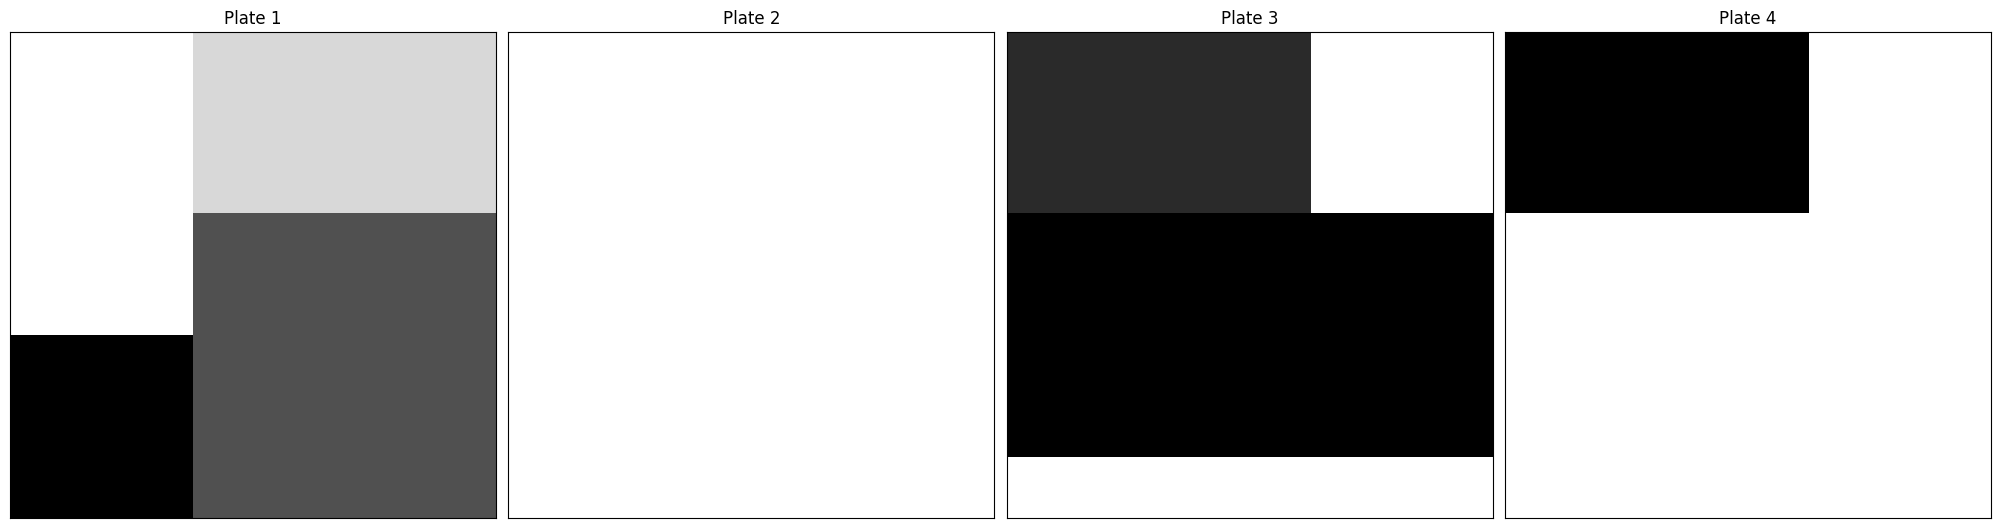

Plate 1:
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 4 | 4 | 4 |
+---+---+---+---+---+
| 5 | 5 | 4 | 4 | 4 |
+---+---+---+---+---+
| 5 | 5 | 4 | 4 | 4 |
+---+---+---+---+---+


Plate 2:
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+


Plate 3:
+---+---+---+---+---+
| 6 | 6 | 6 | 0 | 0 |
+---+---+---+---+---+
| 6 | 6 | 6 | 0 | 0 |
+---+---+---+---+---+
| 7 | 7 | 7 | 7 | 7 |
+---+---+---+---+---+
| 7 | 7 | 7 | 7 | 7 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+


Plate 4:
+---+---+---+---+---+
| 7 | 7 | 7 | 0 | 0 |
+---+---+---+---+---+
| 7 | 7 | 7 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def print_plates(plates):
    """
    Prints the list of plates in a nicely formatted table.
    """
    for i, plate in enumerate(plates):
        print(f"Plate {i+1}:")
        print(tabulate(plate, tablefmt="grid", numalign="center", stralign="center"))
        print("\n")


def split_rectangle(rect_width, rect_height, plate_width, plate_height):
    """
    Splits the large rectangle into smaller rectangles that fit on the plate.
    
    Parameters:
    rect_width (int): Width of the rectangle.
    rect_height (int): Height of the rectangle.
    plate_width (int): Width of the plate.
    plate_height (int): Height of the plate.

    Returns:
    List of tuple (sub_width, sub_height): List of smaller rectangles to place.
    """
    sub_rectangles = []
    
    # Split horizontally if the rectangle is wider than the plate
    if rect_width > plate_width:
        num_split = rect_width // plate_width
        remaining_width = rect_width % plate_width
        for _ in range(num_split):
            sub_rectangles.append((plate_width, rect_height))
        if remaining_width > 0:
            sub_rectangles.append((remaining_width, rect_height))
    
    # Split vertically if the rectangle is taller than the plate
    if rect_height > plate_height:
        num_split = rect_height // plate_height
        remaining_height = rect_height % plate_height
        for _ in range(num_split):
            sub_rectangles.append((rect_width, plate_height))
        if remaining_height > 0:
            sub_rectangles.append((rect_width, remaining_height))
    
    # If both dimensions are smaller than the plate, no split is needed
    if rect_width <= plate_width and rect_height <= plate_height:
        sub_rectangles.append((rect_width, rect_height))

    return sub_rectangles


def find_and_place_rectangle(plates, rect_width, rect_height, fill_value):
    """
    Adds a rectangle to the first available space in the list of plates.
    If no space is available and the rectangle is too large, the rectangle is split 
    and smaller parts are placed in available spaces.

    Parameters:
    plates (list of np.ndarray): List of plates (numpy arrays) to place rectangles.
    rect_width (int): Width of the rectangle.
    rect_height (int): Height of the rectangle.
    fill_value (int): Value to fill the rectangle with.

    Returns:
    list of np.ndarray: Updated list of plates.
    """
    for plate in plates:
        rows, cols = plate.shape
        # Check if the rectangle fits anywhere on the plate
        for i in range(rows - rect_height + 1):
            for j in range(cols - rect_width + 1):
                # Check if rectangle fits in the current position
                if np.all(plate[i:i + rect_height, j:j + rect_width] == 0):
                    # Place the rectangle
                    plate[i:i + rect_height, j:j + rect_width] = fill_value
                    return plates  # Return after placing the rectangle

    # If the rectangle is too large, attempt to split and place smaller rectangles
    if rect_width > plates[0].shape[1] or rect_height > plates[0].shape[0]:
        sub_rectangles = split_rectangle(rect_width, rect_height, plates[0].shape[1], plates[0].shape[0])
        for sub_width, sub_height in sub_rectangles:
            placed = False
            for plate in plates:
                rows, cols = plate.shape
                for i in range(rows - sub_height + 1):
                    for j in range(cols - sub_width + 1):
                        if np.all(plate[i:i + sub_height, j:j + sub_width] == 0):
                            plate[i:i + sub_height, j:j + sub_width] = fill_value
                            placed = True
                            break
                    if placed:
                        break
                if placed:
                    break
            # If no space was found for the sub-rectangle, create a new plate for it
            if not placed:
                new_plate = np.zeros(plates[0].shape, dtype=int)
                new_plate[:sub_height, :sub_width] = fill_value
                plates.append(new_plate)
        return plates

    # If no space is found, create a new plate with original dimensions of the first plate
    if len(plates) > 0:
        first_plate = plates[0]  # Use the dimensions of the first plate
        rows, cols = first_plate.shape
        new_plate = np.zeros((rows, cols), dtype=int)  # Create new plate with original dimensions
        new_plate[:rect_height, :rect_width] = fill_value  # Place the rectangle on the new plate
        plates.append(new_plate)  # Add the new plate to the list
        return plates  # Return the updated plates

    print("Error: No plates available to create a new one.")
    return plates

def plot_plates(plates):
    """
    Visualizes the list of plates using matplotlib with only the outer grid.

    Parameters:
    plates (list of np.ndarray): List of plates (numpy arrays) to visualize.
    """
    num_plates = len(plates)
    
    # Adjust the number of subplots based on the number of plates
    fig, axes = plt.subplots(1, num_plates, figsize=(5 * num_plates, 5))
    
    # Ensure axes is always iterable, even if there is only one plate
    if num_plates == 1:
        axes = [axes]  
    
    for i, plate in enumerate(plates):
        ax = axes[i]
        ax.imshow(plate, cmap='Greys', interpolation='nearest')
        ax.set_title(f"Plate {i + 1}")
        
        # Set limits to start from 0
        ax.set_xlim(0, plate.shape[1]-1)  # X-axis starts from 0
        ax.set_ylim(plate.shape[0]-1, 0)  # Y-axis starts from 0 (inverted Y axis)

        # Display only the outermost grid (around the entire plate)
        ax.grid(True, which='both', color='black', linestyle='-', linewidth=2)  # Outer grid
        ax.set_xticks([0, plate.shape[1] - 1])  # Only ticks on the edges
        ax.set_yticks([0, plate.shape[0] - 1])  # Only ticks on the edges
        ax.grid(which='major', color='black', linestyle='-', linewidth=2)  # Major grid (outer edges)

        # Remove internal grid lines (do not show minor grids)
        ax.set_xticks([])  # Remove internal X ticks
        ax.set_yticks([])  # Remove internal Y ticks

        # Keep the axis labels visible for clarity
        ax.axis('on')

        # Set the aspect ratio to be equal for a more consistent view
        ax.set_aspect('equal', adjustable='box')

    # Adjust layout to remove extra space between plots
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    
    # Remove any padding or extra space between subplots
    plt.tight_layout(pad=0.5)

    plt.show()
# Example usage
if __name__ == "__main__":
    # Initial plate list with one 5x5 plate (numpy array)
    plates = [
        np.zeros((5, 5), dtype=int)
    ]

    # Add rectangles
    plates = find_and_place_rectangle(plates, 2, 3, 1)  # Place 2x3 rectangle with value 1
    plates = find_and_place_rectangle(plates, 3, 2, 2)  # Place 3x2 rectangle with value 2
    plates = find_and_place_rectangle(plates, 5, 5, 3)  # Create a new 5x5 plate with value 3
    plates = find_and_place_rectangle(plates, 3, 3, 4)  # Place 3x2 rectangle with value 2
    plates = find_and_place_rectangle(plates, 2, 2, 5)  # Place 3x2 rectangle with value 2
    plates = find_and_place_rectangle(plates, 3, 2, 6)  # Place 3x2 rectangle with value 2
    plates = find_and_place_rectangle(plates, 8, 2, 7)  # Place 3x2 rectangle with value 2
    # Plot the plates with grid starting from (0, 0)
    plot_plates(plates)
    print_plates(plates)


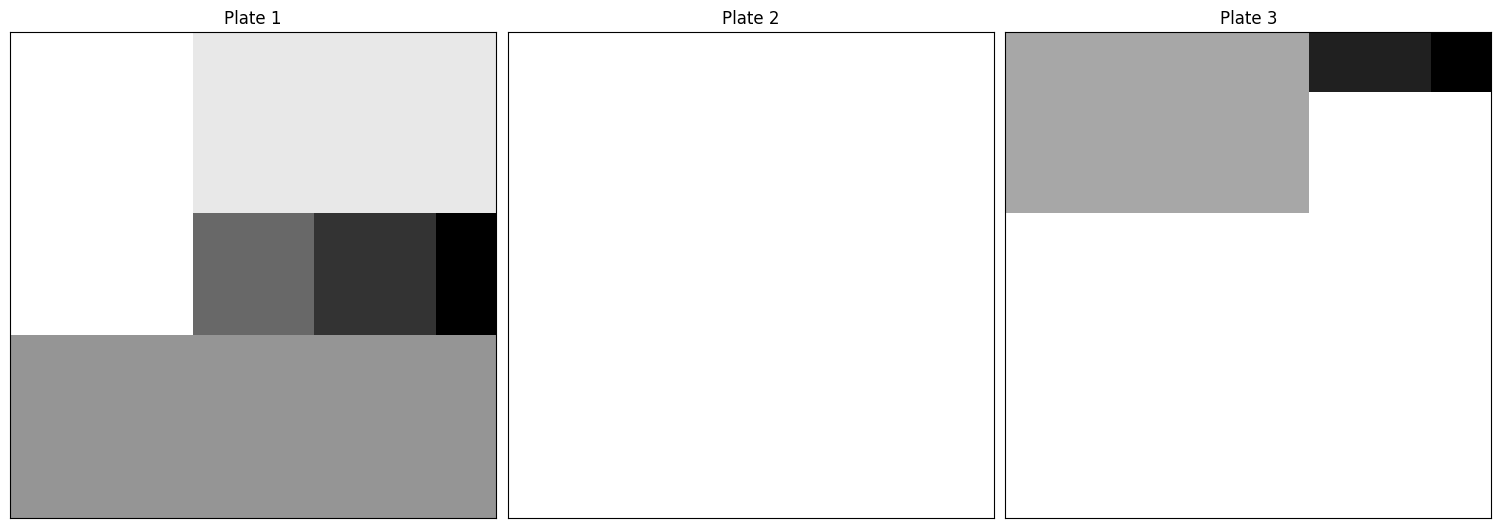

Plate 1:
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 5 | 6 | 7 |
+---+---+---+---+---+
| 4 | 4 | 4 | 4 | 4 |
+---+---+---+---+---+
| 4 | 4 | 4 | 4 | 4 |
+---+---+---+---+---+


Plate 2:
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+


Plate 3:
+---+---+---+---+---+
| 4 | 4 | 4 | 8 | 9 |
+---+---+---+---+---+
| 4 | 4 | 4 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+




In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

class PlatesManager:
    def __init__(self, plate_width, plate_height):
        """
        Initializes the PlatesManager with the dimensions for the plates.
        
        Parameters:
        plate_width (int): The width of each plate.
        plate_height (int): The height of each plate.
        """
        self.plate_width = plate_width
        self.plate_height = plate_height
        self.plates = []
    
    def create(self):
        """
        Creates an initial plate with the specified size.
        """
        # Initialize the first plate with zeros (empty spaces)
        initial_plate = np.zeros((self.plate_height, self.plate_width), dtype=int)
        self.plates.append(initial_plate)

    def find_and_place_rectangle(self, rect_width, rect_height, fill_value):
        """
        Adds a rectangle to the first available space in the list of plates.
        If no space is available and the rectangle is too large, the rectangle is split 
        and smaller parts are placed in available spaces.

        Parameters:
        rect_width (int): Width of the rectangle.
        rect_height (int): Height of the rectangle.
        fill_value (int): Value to fill the rectangle with.

        Returns:
        list of np.ndarray: Updated list of plates.
        """
        # Helper function to check if a rectangle fits into a slot
        def fits_in_slot(slot, rect_width, rect_height):
            slot_width, slot_height = slot
            return rect_width <= slot_width and rect_height <= slot_height

        # Attempt to place rectangle on the plates
        for plate in self.plates:
            rows, cols = plate.shape
            
            # List of available slots (defined as (width, height) tuples)
            available_slots = []
            
            # Iterate through the plate to find empty spaces (available slots)
            for i in range(rows - rect_height + 1):
                for j in range(cols - rect_width + 1):
                    if np.all(plate[i:i + rect_height, j:j + rect_width] == 0):  # Slot found
                        available_slots.append((i, j))  # Save the starting position of the slot
            
            # If available slots were found, place the rectangle in the first slot
            if available_slots:
                slot = available_slots[0]
                i, j = slot
                plate[i:i + rect_height, j:j + rect_width] = fill_value
                return self.plates  # Return after placing the rectangle
        
        # If the rectangle is too large, attempt to split and place smaller rectangles
        if rect_width > self.plates[0].shape[1] or rect_height > self.plates[0].shape[0]:
            sub_rectangles = self.split_rectangle(rect_width, rect_height, self.plates[0].shape[1], self.plates[0].shape[0])
            for sub_width, sub_height in sub_rectangles:
                placed = False
                for plate in self.plates:
                    rows, cols = plate.shape
                    available_slots.clear()  # Reset the available slots

                    for i in range(rows - sub_height + 1):
                        for j in range(cols - sub_width + 1):
                            if np.all(plate[i:i + sub_height, j:j + sub_width] == 0):  # Slot found
                                available_slots.append((i, j))  # Save slot position
                    
                    if available_slots:
                        slot = available_slots[0]
                        i, j = slot
                        plate[i:i + sub_height, j:j + sub_width] = fill_value
                        placed = True
                        break
                if not placed:
                    # No space found for this sub-rectangle, create a new plate for it
                    new_plate = np.zeros(self.plates[0].shape, dtype=int)
                    new_plate[:sub_height, :sub_width] = fill_value
                    self.plates.append(new_plate)
            return self.plates

        # If no space is found, create a new plate with original dimensions of the first plate
        if len(self.plates) > 0:
            first_plate = self.plates[0]  # Use the dimensions of the first plate
            rows, cols = first_plate.shape
            new_plate = np.zeros((rows, cols), dtype=int)  # Create new plate with original dimensions
            new_plate[:rect_height, :rect_width] = fill_value  # Place the rectangle on the new plate
            self.plates.append(new_plate)  # Add the new plate to the list
            return self.plates  # Return the updated plates

        print("Error: No plates available to create a new one.")
        return self.plates

    def split_rectangle(self, rect_width, rect_height, plate_width, plate_height):
        """
        Splits the large rectangle into smaller rectangles that fit on the plate.
        
        Parameters:
        rect_width (int): Width of the rectangle.
        rect_height (int): Height of the rectangle.
        plate_width (int): Width of the plate.
        plate_height (int): Height of the plate.

        Returns:
        List of tuple (sub_width, sub_height): List of smaller rectangles to place.
        """
        sub_rectangles = []
        
        # Split horizontally if the rectangle is wider than the plate
        if rect_width > plate_width:
            num_split = rect_width // plate_width
            remaining_width = rect_width % plate_width
            for _ in range(num_split):
                sub_rectangles.append((plate_width, rect_height))
            if remaining_width > 0:
                sub_rectangles.append((remaining_width, rect_height))
        
        # Split vertically if the rectangle is taller than the plate
        if rect_height > plate_height:
            num_split = rect_height // plate_height
            remaining_height = rect_height % plate_height
            for _ in range(num_split):
                sub_rectangles.append((rect_width, plate_height))
            if remaining_height > 0:
                sub_rectangles.append((rect_width, remaining_height))
        
        # If both dimensions are smaller than the plate, no split is needed
        if rect_width <= plate_width and rect_height <= plate_height:
            sub_rectangles.append((rect_width, rect_height))

        return sub_rectangles

    def plot_plates(self):
        """
        Visualizes the list of plates using matplotlib with only the outer grid.
        """
        num_plates = len(self.plates)
        
        # Adjust the number of subplots based on the number of plates
        fig, axes = plt.subplots(1, num_plates, figsize=(5 * num_plates, 5))
        
        # Ensure axes is always iterable, even if there is only one plate
        if num_plates == 1:
            axes = [axes]  
        
        for i, plate in enumerate(self.plates):
            ax = axes[i]
            ax.imshow(plate, cmap='Greys', interpolation='nearest')
            ax.set_title(f"Plate {i + 1}")
            
            # Set limits to start from 0
            ax.set_xlim(0, plate.shape[1]-1)  # X-axis starts from 0
            ax.set_ylim(plate.shape[0]-1, 0)  # Y-axis starts from 0 (inverted Y axis)

            # Display only the outermost grid (around the entire plate)
            ax.grid(True, which='both', color='black', linestyle='-', linewidth=2)  # Outer grid
            ax.set_xticks([0, plate.shape[1] - 1])  # Only ticks on the edges
            ax.set_yticks([0, plate.shape[0] - 1])  # Only ticks on the edges
            ax.grid(which='major', color='black', linestyle='-', linewidth=2)  # Major grid (outer edges)

            # Remove internal grid lines (do not show minor grids)
            ax.set_xticks([])  # Remove internal X ticks
            ax.set_yticks([])  # Remove internal Y ticks

            # Keep the axis labels visible for clarity
            ax.axis('on')

            # Set the aspect ratio to be equal for a more consistent view
            ax.set_aspect('equal', adjustable='box')

        # Adjust layout to remove extra space between plots
        fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
        
        # Remove any padding or extra space between subplots
        plt.tight_layout(pad=0.5)

        plt.show()

    def print_plates(self):
        """
        Prints the list of plates in a nicely formatted table.
        """
        for i, plate in enumerate(self.plates):
            print(f"Plate {i+1}:")
            print(tabulate(plate, tablefmt="grid", numalign="center", stralign="center"))
            print("\n")

# Example usage
if __name__ == "__main__":
    plates_manager = PlatesManager(5, 5)
    plates_manager.create()  # Create initial plate
    plates_manager.find_and_place_rectangle(2, 3, 1)  # Place a 2x3 rectangle with value 1
    plates_manager.find_and_place_rectangle(3, 2, 2)  # Place a 3x2 rectangle with value 2
    plates_manager.find_and_place_rectangle(5, 5, 3)  # Place a 5x5 rectangle with value 3
    plates_manager.find_and_place_rectangle(8, 2, 4)  # Place a 5x5 rectangle with value 3
    for i in range(5):
            plates_manager.find_and_place_rectangle(1, 1, 5+i)  # Place a 5x5 rectangle with value 3

    plates_manager.plot_plates()  # Plot the plates
    plates_manager.print_plates()  # Print the plates in table format


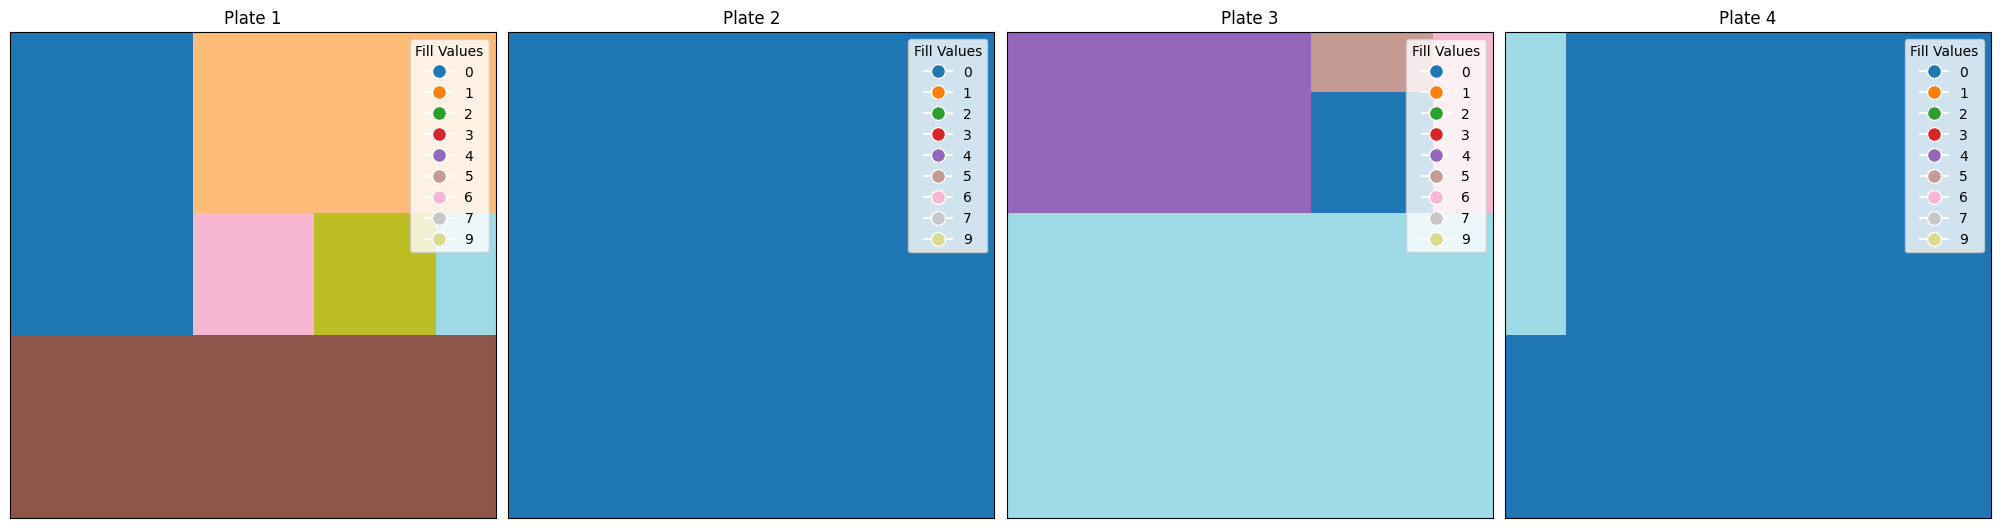

Plate 1:
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 2 |
+---+---+---+---+---+
| 1 | 1 | 5 | 6 | 7 |
+---+---+---+---+---+
| 4 | 4 | 4 | 4 | 4 |
+---+---+---+---+---+
| 4 | 4 | 4 | 4 | 4 |
+---+---+---+---+---+


Plate 2:
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+
| 3 | 3 | 3 | 3 | 3 |
+---+---+---+---+---+


Plate 3:
+---+---+---+---+---+
| 4 | 4 | 4 | 5 | 6 |
+---+---+---+---+---+
| 4 | 4 | 4 | 0 | 6 |
+---+---+---+---+---+
| 9 | 9 | 9 | 9 | 9 |
+---+---+---+---+---+
| 9 | 9 | 9 | 9 | 9 |
+---+---+---+---+---+
| 9 | 9 | 9 | 9 | 9 |
+---+---+---+---+---+


Plate 4:
+---+---+---+---+---+
| 7 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 7 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 7 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib

class PlatesManager:
    def __init__(self, plate_width, plate_height):
        """
        Initializes the PlatesManager with the dimensions for the plates.
        
        Parameters:
        plate_width (int): The width of each plate.
        plate_height (int): The height of each plate.
        """
        self.plate_width = plate_width
        self.plate_height = plate_height
        self.plates = []
    
    def create(self):
        """
        Creates an initial plate with the specified size.
        """
        # Initialize the first plate with zeros (empty spaces)
        initial_plate = np.zeros((self.plate_height, self.plate_width), dtype=int)
        self.plates.append(initial_plate)

    def find_and_place_rectangle(self, rect_width, rect_height, fill_value, rotate=False):
        """
        Adds a rectangle to the first available space in the list of plates.
        If no space is available and the rectangle is too large, the rectangle is split 
        and smaller parts are placed in available spaces. It can optionally try to rotate the rectangle.

        Parameters:
        rect_width (int): Width of the rectangle.
        rect_height (int): Height of the rectangle.
        fill_value (int): Value to fill the rectangle with.
        rotate (bool): Whether to attempt rotating the rectangle (90 degrees) before placement.

        Returns:
        list of np.ndarray: Updated list of plates.
        """
        # If rotation is enabled, try rotating the rectangle
        if rotate:
            rect_width, rect_height = rect_height, rect_width  # Swap width and height

        # Helper function to check if a rectangle fits into a slot
        def fits_in_slot(slot, rect_width, rect_height):
            slot_width, slot_height = slot
            return rect_width <= slot_width and rect_height <= slot_height

        # Attempt to place rectangle on the plates
        for plate in self.plates:
            rows, cols = plate.shape
            
            # List of available slots (defined as (width, height) tuples)
            available_slots = []
            
            # Iterate through the plate to find empty spaces (available slots)
            for i in range(rows - rect_height + 1):
                for j in range(cols - rect_width + 1):
                    if np.all(plate[i:i + rect_height, j:j + rect_width] == 0):  # Slot found
                        available_slots.append((i, j))  # Save the starting position of the slot
            
            # If available slots were found, place the rectangle in the first slot
            if available_slots:
                slot = available_slots[0]
                i, j = slot
                plate[i:i + rect_height, j:j + rect_width] = fill_value
                return self.plates  # Return after placing the rectangle
        
        # If the rectangle is too large, attempt to split and place smaller rectangles
        if rect_width > self.plates[0].shape[1] or rect_height > self.plates[0].shape[0]:
            sub_rectangles = self.split_rectangle(rect_width, rect_height, self.plates[0].shape[1], self.plates[0].shape[0])
            for sub_width, sub_height in sub_rectangles:
                placed = False
                for plate in self.plates:
                    rows, cols = plate.shape
                    available_slots.clear()  # Reset the available slots

                    for i in range(rows - sub_height + 1):
                        for j in range(cols - sub_width + 1):
                            if np.all(plate[i:i + sub_height, j:j + sub_width] == 0):  # Slot found
                                available_slots.append((i, j))  # Save slot position
                    
                    if available_slots:
                        slot = available_slots[0]
                        i, j = slot
                        plate[i:i + sub_height, j:j + sub_width] = fill_value
                        placed = True
                        break
                if not placed:
                    # No space found for this sub-rectangle, create a new plate for it
                    new_plate = np.zeros(self.plates[0].shape, dtype=int)
                    new_plate[:sub_height, :sub_width] = fill_value
                    self.plates.append(new_plate)
            return self.plates

        # If no space is found, create a new plate with original dimensions of the first plate
        if len(self.plates) > 0:
            first_plate = self.plates[0]  # Use the dimensions of the first plate
            rows, cols = first_plate.shape
            new_plate = np.zeros((rows, cols), dtype=int)  # Create new plate with original dimensions
            new_plate[:rect_height, :rect_width] = fill_value  # Place the rectangle on the new plate
            self.plates.append(new_plate)  # Add the new plate to the list
            return self.plates  # Return the updated plates

        print("Error: No plates available to create a new one.")
        return self.plates

    def split_rectangle(self, rect_width, rect_height, plate_width, plate_height):
        """
        Splits the large rectangle into smaller rectangles that fit on the plate.
        
        Parameters:
        rect_width (int): Width of the rectangle.
        rect_height (int): Height of the rectangle.
        plate_width (int): Width of the plate.
        plate_height (int): Height of the plate.

        Returns:
        List of tuple (sub_width, sub_height): List of smaller rectangles to place.
        """
        sub_rectangles = []
        
        # Split horizontally if the rectangle is wider than the plate
        if rect_width > plate_width:
            num_split = rect_width // plate_width
            remaining_width = rect_width % plate_width
            for _ in range(num_split):
                sub_rectangles.append((plate_width, rect_height))
            if remaining_width > 0:
                sub_rectangles.append((remaining_width, rect_height))
        
        # Split vertically if the rectangle is taller than the plate
        if rect_height > plate_height:
            num_split = rect_height // plate_height
            remaining_height = rect_height % plate_height
            for _ in range(num_split):
                sub_rectangles.append((rect_width, plate_height))
            if remaining_height > 0:
                sub_rectangles.append((rect_width, remaining_height))
        
        # If both dimensions are smaller than the plate, no split is needed
        if rect_width <= plate_width and rect_height <= plate_height:
            sub_rectangles.append((rect_width, rect_height))

        return sub_rectangles

    def plot_plates(self):
        """
        Visualizes the list of plates using matplotlib with color-coded rectangles and adds a legend.
        """
        num_plates = len(self.plates)
        
        # Adjust the number of subplots based on the number of plates
        fig, axes = plt.subplots(1, num_plates, figsize=(5 * num_plates, 5))
        
        if num_plates == 1:
            axes = [axes]

        # Create a dynamic color map for the unique fill values
        unique_values = np.unique(np.concatenate([plate.flatten() for plate in self.plates]))
        cmap = matplotlib.colormaps['tab20']  # Use a colormap with enough colors for each unique value
        color_map = {val: cmap(i / len(unique_values)) for i, val in enumerate(unique_values)}

        # Create a list of labels for the legend (fill_value -> color)
        handles = []
        labels = []
        for val, color in color_map.items():
            # Create a handle (patch) for each unique value
            handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
            handles.append(handle)
            labels.append(str(val))  # Use the fill_value as the label

        for i, plate in enumerate(self.plates):
            ax = axes[i]
            ax.imshow(plate, cmap=cmap, interpolation='nearest')

            # Add the legend to the plot
            ax.legend(handles, labels, title="Fill Values", loc="upper right", bbox_to_anchor=(1, 1))

            ax.set_title(f"Plate {i + 1}")
            ax.set_xlim(0, plate.shape[1] - 1)
            ax.set_ylim(plate.shape[0] - 1, 0)
            ax.grid(True, which='both', color='black', linestyle='-', linewidth=2)
            ax.set_xticks([0, plate.shape[1] - 1])
            ax.set_yticks([0, plate.shape[0] - 1])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('on')
            ax.set_aspect('equal', adjustable='box')

        plt.tight_layout(pad=0.5)
        plt.show()
    
    def print_plates(self):
        """
        Prints the list of plates in a nicely formatted table.
        """
        for i, plate in enumerate(self.plates):
            print(f"Plate {i+1}:")
            print(tabulate(plate, tablefmt="grid", numalign="center", stralign="center"))
            print("\n")

# Example usage
if __name__ == "__main__":
    plates_manager = PlatesManager(5, 5)
    plates_manager.create()  # Create initial plate
    plates_manager.find_and_place_rectangle(2, 3, 1)  # Place a 2x3 rectangle with value 1
    plates_manager.find_and_place_rectangle(3, 2, 2)  # Place a 3x2 rectangle with value 2
    plates_manager.find_and_place_rectangle(5, 5, 3)  # Place a 5x5 rectangle with value 3
    plates_manager.find_and_place_rectangle(8, 2, 4)  # Place a 5x5 rectangle with value 3
    for i in range(3):
            plates_manager.find_and_place_rectangle(1, 1, 5+i)  # Place a 5x5 rectangle with value 3
    plates_manager.find_and_place_rectangle(3, 5, 9,True)  # Place a 5x5 rectangle with value 3
    for i in range(3):
        plates_manager.find_and_place_rectangle(1+i, 1, 5+i,True)  # Place a 5x5 rectangle with value 3
        
    plates_manager.plot_plates()  # Plot the plates
    plates_manager.print_plates()  # Print the plates in table format


In [ ]:
import numpy as np
import heapq
import matplotlib
import matplotlib.pyplot as plt


class PlatesManager:
    def __init__(self, plate_width, plate_height):
        """
        Initializes the PlatesManager with the dimensions for the plates.
        """
        self.plate_width = plate_width
        self.plate_height = plate_height
        self.plates = []
        self.available_slots = []  # Priority queue to track available slots
        
    def calculate_cost(self, plates):
        """
        Calculate the cost of the plate arrangement based on the number of plates used
        and the unused space on each plate. Fewer plates and less unused space is cheaper.
        """
        num_plates = len(plates)
        unused_space = 0  # Track unused space in each plate
        
        for plate in plates:
            unused_space += np.count_nonzero(plate == 0)  # Count empty spaces (zeroes) on the plate

        # Cost can be defined as the number of plates plus unused space
        # You could adjust this cost function based on your specific requirements
        cost = num_plates*(self.plate_width*self.plate_height) + unused_space
        return cost


    def create(self):
        """
        Create an initial plate with the specified size.
        """
        initial_plate = np.zeros((self.plate_height, self.plate_width), dtype=int)
        self.plates.append(initial_plate)
        # Push the initial plate into the available slots heap (with priority on available space)
        heapq.heappush(self.available_slots, (self.plate_width * self.plate_height, 0))

    def find_and_place_rectangle(self, rect_width, rect_height, fill_value, rotate=False):
        """
        Try to place a rectangle on the first available plate or split it if it's too large.
        """
        if rotate:
            rect_width, rect_height = rect_height, rect_width
            
        # Handle large rectangles that might require splitting
        if rect_width > self.plate_width or rect_height > self.plate_height:
            sub_rectangles = self.split_large_rectangle(rect_width, rect_height)
            cost, order=self.place_sub_rectangles(sub_rectangles, fill_value)
            self.plates=order
            return cost
        
        # If the rectangle fits within the plate size, proceed as normal
        cost, order=self.place_rectangle_on_existing_plates(rect_width, rect_height, fill_value)
        self.plates=order
        return cost
    
    def split_large_rectangle(self, rect_width, rect_height):
        """
        Splits the large rectangle into smaller sub-rectangles.
        """
        sub_rectangles = []
        
        # Try splitting along the width or height of the plate
        while rect_width > self.plate_width or rect_height > self.plate_height:
            if rect_width > self.plate_width:
                sub_rectangles.append((self.plate_width, rect_height))
                rect_width -= self.plate_width
            elif rect_height > self.plate_height:
                sub_rectangles.append((rect_width, self.plate_height))
                rect_height -= self.plate_height

        # Add the final remaining part
        if rect_width <= self.plate_width and rect_height <= self.plate_height:
            sub_rectangles.append((rect_width, rect_height))

        return sub_rectangles

    def place_sub_rectangles(self, sub_rectangles, fill_value):
        """
        Place the sub-rectangles onto the plates, reusing space or creating new plates as necessary.
        This version does not modify self.plates, instead returns a new list of plates with updated placements.
        """
        new_plates = [plate.copy() for plate in self.plates]  # Make a copy of the current plates
        available_slots_copy = list(self.available_slots)  # Copy the available slots list
        
        for sub_width, sub_height in sub_rectangles:
            placed = False
            while not placed:
                # Try placing on an existing plate first
                if available_slots_copy:
                    available_space, plate_index = heapq.heappop(available_slots_copy)
                    plate = new_plates[plate_index]
                    rows, cols = plate.shape
                    for i in range(rows - sub_height + 1):
                        for j in range(cols - sub_width + 1):
                            if np.all(plate[i:i + sub_height, j:j + sub_width] == 0):  # Slot found
                                plate[i:i + sub_height, j:j + sub_width] = fill_value
                                # Update available space tracking
                                new_available_space = available_space - (sub_width * sub_height)
                                heapq.heappush(available_slots_copy, (new_available_space, plate_index))
                                placed = True
                                break
                    if placed:
                        break
                if not placed:
                    # If no space found, create a new plate
                    new_plate = np.zeros((self.plate_height, self.plate_width), dtype=int)
                    new_plates.append(new_plate)
                    heapq.heappush(available_slots_copy, (self.plate_width * self.plate_height, len(new_plates) - 1))
                    new_plate[:sub_height, :sub_width] = fill_value
                    placed = True
                    
        cost=self.calculate_cost(new_plates)
        return cost, new_plates  # Return the new plates list


    def place_rectangle_on_existing_plates(self, rect_width, rect_height, fill_value):
        """
        Tries to place a regular rectangle on existing plates, without modifying the original plates.
        """
        new_plates = [plate.copy() for plate in self.plates]  # Create a copy of self.plates

        for plate in new_plates:
            rows, cols = plate.shape
            for i in range(rows - rect_height + 1):
                for j in range(cols - rect_width + 1):
                    if np.all(plate[i:i + rect_height, j:j + rect_width] == 0):  # Slot found
                        plate[i:i + rect_height, j:j + rect_width] = fill_value
                        return new_plates  # Return the copy of plates after placing the rectangle

        # If no space is found, create a new plate with original dimensions
        new_plate = np.zeros((self.plate_height, self.plate_width), dtype=int)
        new_plates.append(new_plate)
        new_plate[:rect_height, :rect_width] = fill_value
        
        cost=self.calculate_cost(new_plates)
        return cost, new_plates  # Return the copy of plates

    def print_plates(self):
        """
        Prints the list of plates in a nicely formatted table.
        """
        for i, plate in enumerate(self.plates):
            print(f"Plate {i + 1}:")
            print(tabulate(plate, tablefmt="grid", numalign="center", stralign="center"))
            print("\n")

    def plot_plates(self):
        """
        Visualizes the list of plates using matplotlib with color-coded rectangles.
        """        
        num_plates = len(self.plates)
        
        fig, axes = plt.subplots(1, num_plates, figsize=(5 * num_plates, 5))
        if num_plates == 1:
            axes = [axes]
        
        cmap = matplotlib.colormaps['tab20']
        color_map = {i: cmap(i / len(self.plates)) for i in range(len(self.plates))}

        for i, plate in enumerate(self.plates):
            ax = axes[i]
            ax.imshow(plate, cmap=cmap, interpolation='nearest')
            ax.set_title(f"Plate {i + 1}")
            ax.grid(True)
            ax.set_xticks([])  # Hide x ticks
            ax.set_yticks([])  # Hide y ticks
            ax.axis('off')

        plt.tight_layout()
        plt.show()


# Example usage:
if __name__ == "__main__":
    plates_manager = PlatesManager(5, 5)
    plates_manager.create()  # Create initial plate
    plates_manager.find_and_place_rectangle(2, 3, 1)  # Place a 2x3 rectangle with value 1
    plates_manager.find_and_place_rectangle(3, 2, 2)  # Place a 3x2 rectangle with value 2
    plates_manager.find_and_place_rectangle(5, 5, 3)  # Place a 5x5 rectangle with value 3
    plates_manager.find_and_place_rectangle(8, 2, 4)  # Place a 5x5 rectangle with value 3
    for i in range(3):
            plates_manager.find_and_place_rectangle(1, 1, 5+i)  # Place a 5x5 rectangle with value 3
    plates_manager.find_and_place_rectangle(3, 5, 8,True)  # Place a 5x5 rectangle with value 3
    for i in range(3):
        plates_manager.find_and_place_rectangle(1+i, 1, 9+i,True)  # Place a 5x5 rectangle with value 3
        
    plates_manager.plot_plates()  # Plot the plates
    plates_manager.print_plates()  # Print the plates in table format


ValueError: not enough values to unpack (expected 2, got 1)

New methods